## About Dataset
### Context
This data set is created only for the learning purpose of the customer segmentation concepts , also known as market basket analysis . I will demonstrate this by using unsupervised ML technique (KMeans Clustering Algorithm) in the simplest form.

### Content
You are owing a supermarket mall and through membership cards , you have some basic data about your customers like Customer ID, age, gender, annual income and spending score.
Spending Score is something you assign to the customer based on your defined parameters like customer behavior and purchasing data.

### Problem Statement
You own the mall and want to understand the customers like who can be easily converge [Target Customers] so that the sense can be given to marketing team and plan the strategy accordingly.


### Inspiration
By the end of this case study , you would be able to answer below questions.
1) How to achieve customer segmentation using machine learning algorithm (KMeans Clustering) in Python in simplest way.
2) Who are your target customers with whom you can start marketing strategy [easy to converse]
3) How the marketing strategy works in real world

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go 


from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture

import warnings 
warnings.filterwarnings("ignore")

#### Loading dataset and EDA

In [3]:
data=pd.read_csv("/Users/apple/Downloads/Mall_Customers.csv")

In [4]:
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [5]:
data.info()                  #general information for the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
data.columns                  #columns in the dataset

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [7]:
data.rename(columns = {"Annual Income (k$)": "Annual_Income", "Spending Score (1-100)": "Score"}, inplace = True)
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual_Income', 'Score'], dtype='object')

In [8]:
data.isnull().sum()           #checking for missing data

CustomerID       0
Gender           0
Age              0
Annual_Income    0
Score            0
dtype: int64

In [9]:
data.nunique()               #no of unique values in columns

CustomerID       200
Gender             2
Age               51
Annual_Income     64
Score             84
dtype: int64

In [10]:
data[data.duplicated()]       #checking for duplicates

,CustomerID,Gender,Age,Annual_Income,Score


In [11]:
data.shape                    #no of rows and columns respectively

(200, 5)

In [12]:
data.describe()               #descriptive stats

,CustomerID,Age,Annual_Income,Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [13]:
# correlation between numerical columns

data[['Age', 'Annual_Income', 'Score']].corr()

,Age,Annual_Income,Score
Age,1.000000,-0.012398,-0.327227
Annual_Income,-0.012398,1.000000,0.009903
Score,-0.327227,0.009903,1.000000


* Majority of the customers are 49 years of age and below.
* The  annual income range of customers is between \\$15,000 to \\$137,000. The averge annual income of customers \\$60,560.
* There are 4 numerical columns and 1 categorical column.
* There are no correlation between the numerical columns

In [14]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual_Income', 'Score'], dtype='object')

In [15]:
data['Gender'].value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

Text(0.5, 1.0, 'Num of Males and Females')

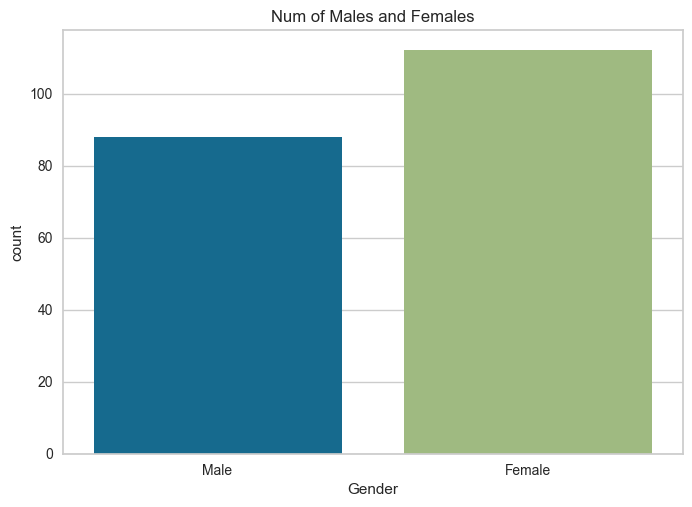

In [16]:
sns.countplot(data=data, x="Gender", hue="Gender")
plt.title("Num of Males and Females")


From the value_counts() function and coutplot graph shows that males are less than females in the dataset.

<Axes: >

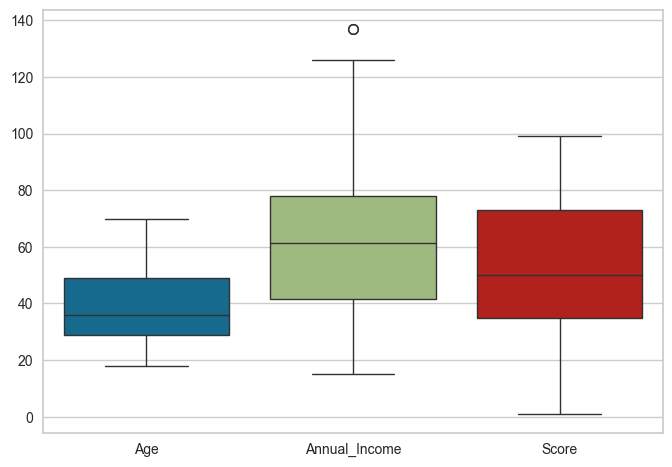

In [17]:
# checking for outliers in our numerical col dataset

sns.boxplot(data.iloc[:,2:])

Presence of only one outlier in the data, removal not necessary

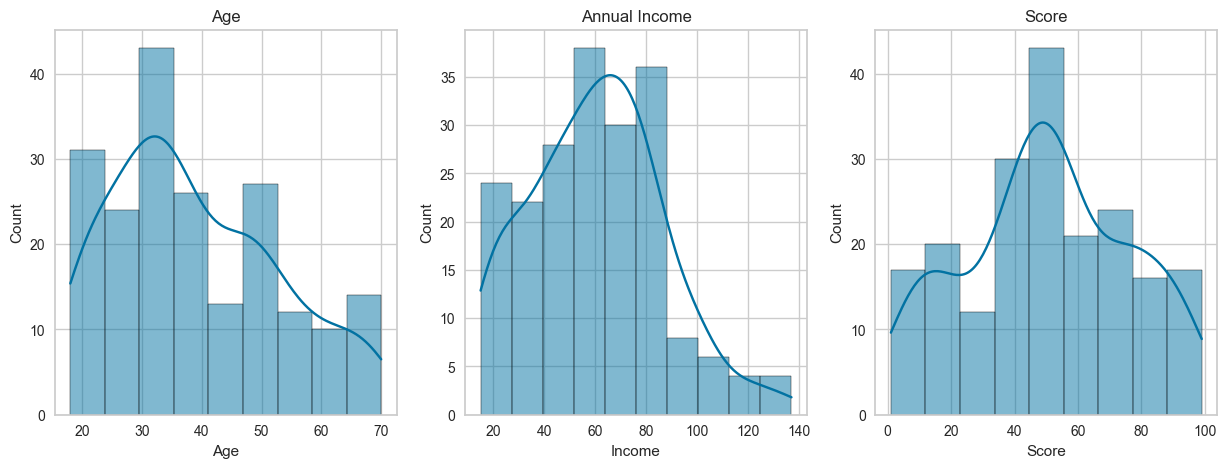

In [18]:
# distribution of Age, Annual income and Score

plt.figure(figsize = (15,5))

plt.subplot(1,3,1)
sns.histplot(data.Age, kde = True)
plt.title("Age")
plt.xlabel("Age");


plt.subplot(1,3,2)
sns.histplot(data.Annual_Income, kde = True)
plt.title("Annual Income")
plt.xlabel("Income");

plt.subplot(1, 3, 3)
sns.histplot(data.Score, kde = True)
plt.title("Score")
plt.xlabel("Score");

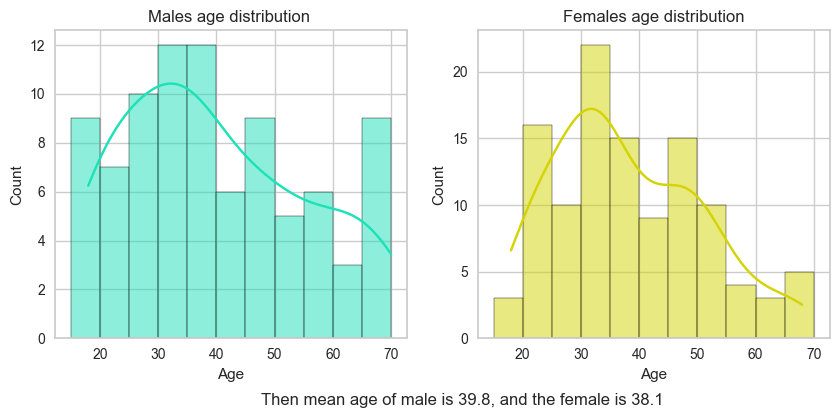

In [19]:
# Distribution of age with respect to gender

males = data[data.Gender == "Male"]["Age"]
females = data[data.Gender != "Male"]['Age']

plt.figure(figsize = (10,4))

plt.subplot(1,2,1)
sns.histplot(males, color='#1DE1B8', bins = range(15,75,5), kde = True)
plt.title("Males age distribution ")

plt.subplot(1,2,2)
sns.histplot(females, color = '#D4D404', bins = range(15,75,5), kde = True)
plt.title("Females age distribution");

plt.text(-25,-5,f"Then mean age of male is {round(males.mean(),1)}, and the female is {round(females.mean(),1)}")

plt.show()

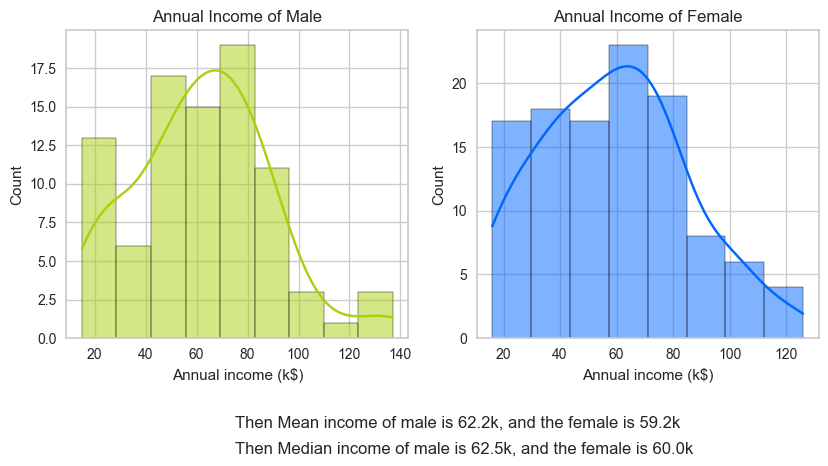

In [20]:
# distribution of annual income with respect to gender

income_male = data[data.Gender == "Male"]["Annual_Income"]
income_female = data[data.Gender != "Male"]["Annual_Income"]

plt.figure(figsize = (15, 4))
plt.subplot(1,3,1)
sns.histplot(income_male, color = '#A8D10E', kde=True)
plt.title("Annual Income of Male")
plt.xlabel("Annual income (k$)")

plt.subplot(1,3,2)
sns.histplot(income_female, color = '#0066ff', kde=True)
plt.title("Annual Income of Female")
plt.xlabel("Annual income (k$)")

plt.text(-75,-7,f"Then Mean income of male is {round(income_male.mean(),1)}k, and the female is {round(income_female.mean(),1)}k")
plt.text(-75,-9,f"Then Median income of male is {round(income_male.median(),1)}k, and the female is {round(income_female.median(),1)}k")
plt.show()

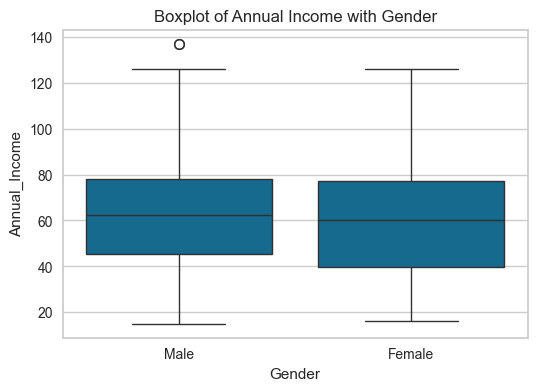

In [21]:
plt.figure(figsize = (6,4))
sns.boxplot(x = 'Gender', y = "Annual_Income", data = data)
plt.title("Boxplot of Annual Income with Gender")
plt.show()


The only outlier present in the dataset belongs to the male gender.

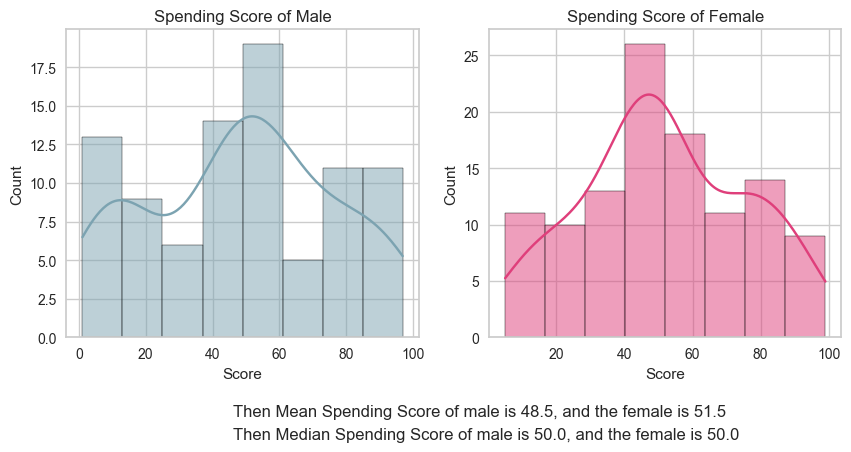

In [22]:
# Distribution of spending score with respect to gender

score_male = data[data.Gender == "Male"]["Score"]
score_female = data[data.Gender != "Male"]["Score"]

plt.figure(figsize = (10,4))
plt.subplot(1,2,1)
sns.histplot(score_male, color = "#7CA3B1", kde=True)
plt.title("Spending Score of Male")

plt.subplot(1,2,2)
sns.histplot(score_female, color = '#DF3F7B', kde=True)
plt.title("Spending Score of Female")

plt.text(-75,-7,f"Then Mean Spending Score of male is {round(score_male.mean(),1)}, and the female is {round(score_female.mean(),1)}")
plt.text(-75,-9,f"Then Median Spending Score of male is {round(score_male.median(),1)}, and the female is {round(score_female.median(),1)}")
plt.show()

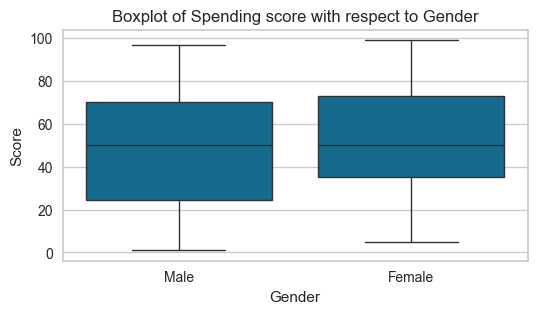

In [23]:
plt.figure(figsize = (6,3))

sns.boxplot(x = data.Gender, y = data.Score)
plt.title('Boxplot of Spending score with respect to Gender')
plt.show()


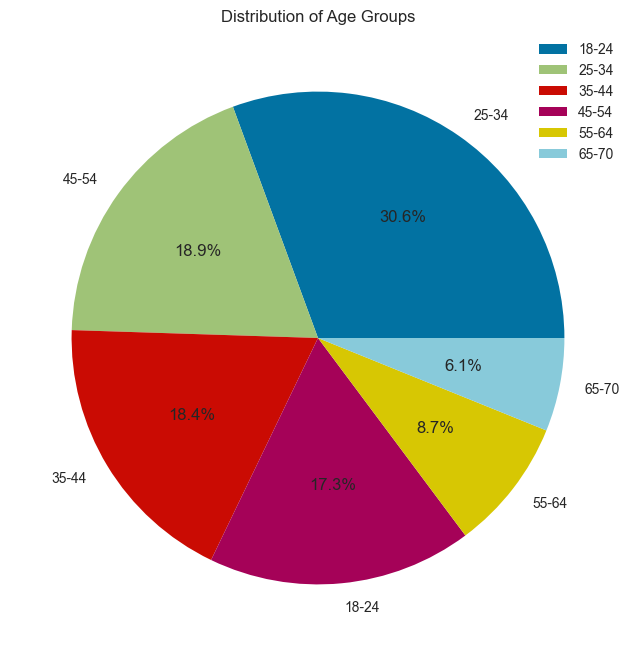

In [24]:
# Distribution of  age group

data['Age_Group'] = pd.cut(data.Age, bins = [18, 25, 35, 45, 55, 65, 70], labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65-70'])

plt.figure(figsize = (8, 8))
plt.pie(data.Age_Group.value_counts(), labels = data.Age_Group.value_counts().index, autopct='%1.1f%%')
plt.title('Distribution of Age Groups')
plt.legend(['18-24', '25-34', '35-44', '45-54', '55-64', '65-70'])
plt.show()



From the pie chart above, the age_group that frequents the mall the most is the 25-34 with 30.6% while the age group 65-70 frequents least with 6.1%.

In [25]:
me=data.groupby("Age_Group")['Score'].mean()
me


Age_Group
18-24    54.352941
25-34    64.450000
35-44    44.833333
45-54    36.702703
55-64    32.117647
65-70    47.250000
Name: Score, dtype: float64

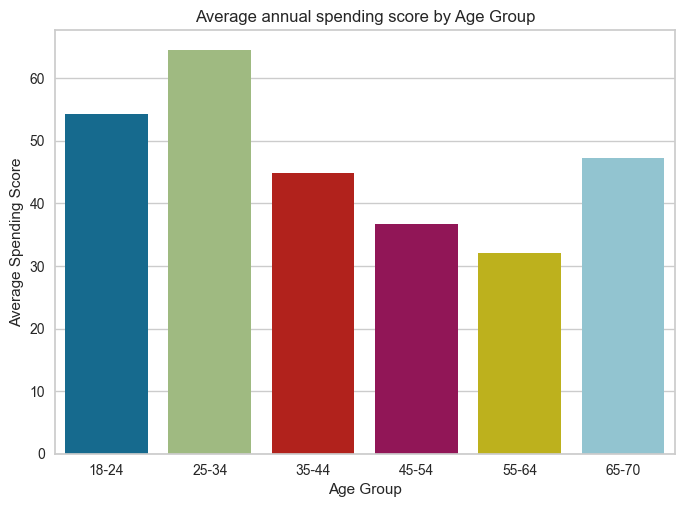

In [26]:
# Mean spending score of each age_group
mean_score=data.groupby("Age_Group")['Score'].mean()

sns.barplot(x=mean_score.index, y=mean_score.values, hue=mean_score.index)
plt.title("Average annual spending score by Age Group")
plt.ylabel("Average Spending Score")
plt.xlabel("Age Group")
plt.show()


Surprisingly, the graph above shows the age_group 65-70 with the least distribution have a higher spending score than most age_groups. 

In [27]:
data.drop("Age_Group", axis = 1, inplace = True)

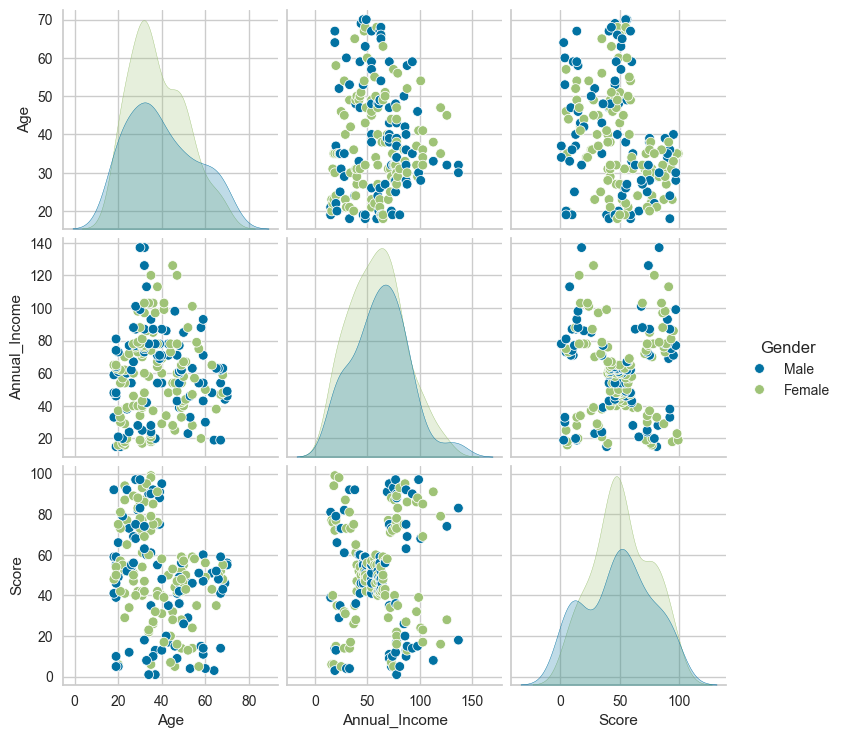

In [28]:
sns.pairplot(data.drop("CustomerID", axis = 1), hue = "Gender");


From above plot we can say that the gender has no direct relation to segmenting customers.


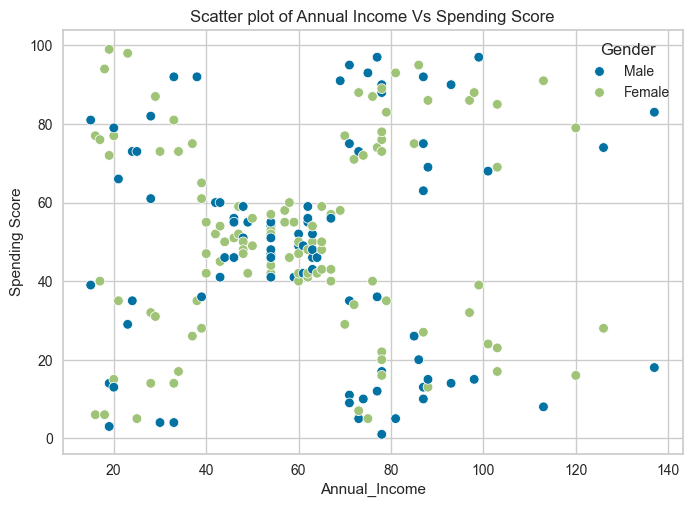

In [29]:
sns.scatterplot(x = data.Annual_Income, y = data.Score, hue = data.Gender)
plt.title("Scatter plot of Annual Income Vs Spending Score")
plt.ylabel("Spending Score")
plt.show()


From the scatter plot shown above, it's evident that only "Annual Income" and "Spending Score" provide meaningful information for clustering. Customers can be segmented into the 5 types of clusters depending on Annual Income and Spending Score

In [30]:
data.to_csv('Mall_data2.csv')